In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from compotime.preprocess import treat_small

In [2]:
def plot_time_series(
    time_series: pd.DataFrame,
    fitted_curve: pd.DataFrame = None,
    predictions: pd.DataFrame = None,
    num_series: int = None,
) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:
        plt.axvline(predictions.index[0], color="red", linestyle="--")

    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")  # Move legend to right corner
    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
df = pd.read_csv("data/share_energy_source.csv")
df["Year"] = [pd.Period(x) for x in df["Year"]]
df = df.set_index("Year")

rng = np.random.default_rng(0)

nullable_periods = 15
years = pd.period_range("1965", periods=nullable_periods, freq="Y")
for col in df.columns[1:]:
    # Set different starts
    df.loc[years[: rng.integers(0, high=10, size=1).item()], col] = np.nan

df = df.div(df.sum(axis=1), axis=0)

df = treat_small(df, minimum=0.005)
df

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Other renewables
Year,,,,,,,,
1965,0.736811,NaN,NaN,NaN,NaN,NaN,0.258189,0.005000
1966,0.734242,NaN,NaN,NaN,NaN,NaN,0.260758,0.005000
1967,0.663719,NaN,NaN,NaN,0.095209,NaN,0.236073,0.005000
1968,0.661324,NaN,NaN,NaN,0.092113,0.005000,0.236563,0.005000
1969,0.660472,NaN,NaN,NaN,0.089959,0.005000,0.239569,0.005000
1970,0.659015,NaN,NaN,0.005565,0.086362,0.005000,0.239059,0.005000
1971,0.652996,NaN,0.005000,0.007261,0.084647,0.005000,0.240095,0.005000
1972,0.656143,NaN,0.005000,0.009409,0.082772,0.005000,0.236676,0.005000
1973,0.485469,0.263631,0.005000,0.008633,0.057493,0.005000,0.169775,0.005000


In [4]:
%%time
from compotime import LocalLevelForecaster

horizon = 10

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 42.2 s, sys: 10.8 ms, total: 42.2 s
Wall time: 42.2 s


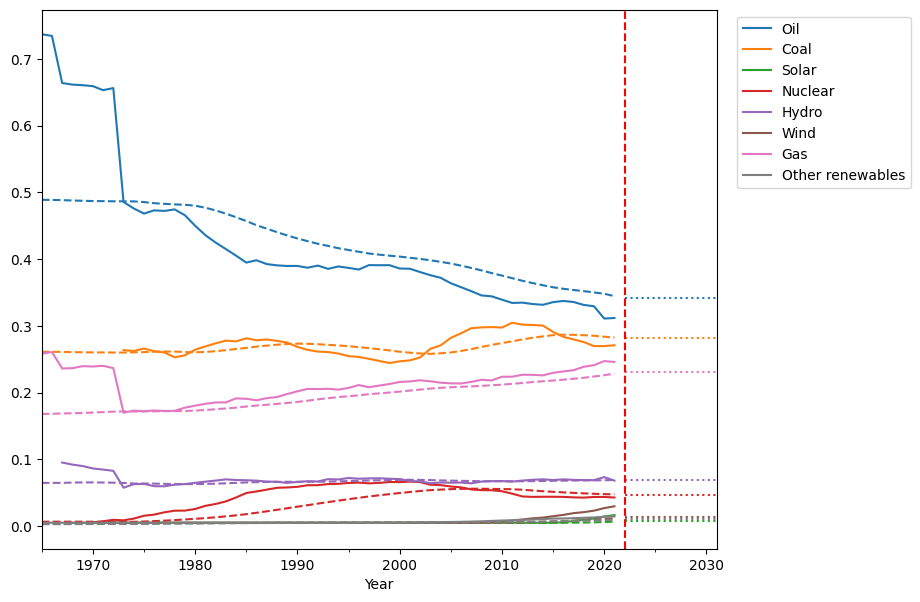

In [5]:
plot_time_series(df, model.fitted_curve_, predictions)

In [6]:
%%time
from compotime import LocalTrendForecaster

horizon = 10

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 1min 24s, sys: 10.1 ms, total: 1min 24s
Wall time: 1min 24s


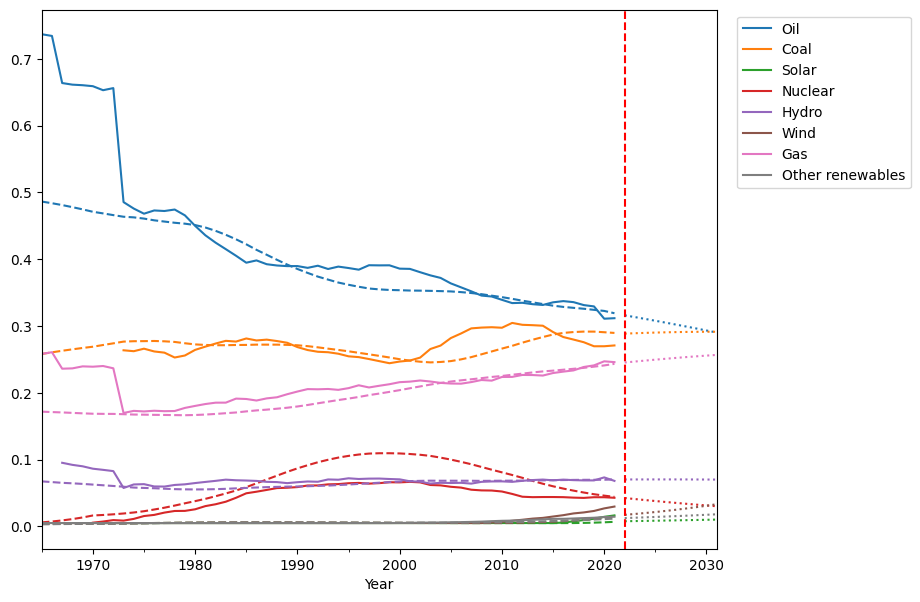

In [7]:
plot_time_series(df, model.fitted_curve_, predictions)